In [166]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [167]:
model1 = pd.read_csv(r'C:\Users\yangh\OneDrive\바탕 화면\관리종목 예측 모형 개발\Model1(original data).csv')

In [168]:
model1.head()

,ROA(Operating Income)(%),ROA(Pretax Income)(%),ROA(Net Income)(%),"ROA(Comprehensive Income, 3y)(%)",ROE(Operating Income)(%),ROE(Pretax Income)(%),ROE(Net Income)(%),Total Debt to Total Equity(%),Cashflow(comm) to Total Equity(avg)(%),Cashflow to Revenue(%),...,Cashflow to Total Assets(avg)(%),Cashflow to Total Debt(avg)(%),Asset Turnover Ratio(times),Capital Stock Turnover Ratio(times),Liability Turnover Ratio(times),Equity Turnover Ratio(times),Total Liabilities Growth Rate(yoy)(%),Total Assets Growth Rate(yoy)(%),Sales Growth Rate(yoy)(%),target
0,-26.03,-33.86,-33.86,-33.86,-60.01,-78.08,-78.08,212.69,-59.03,-336.31,...,-25.60,-66.61,0.08,0.03,0.13,0.18,-1.40,-29.54,-91.86,1
1,-24.27,-40.82,-40.82,-40.82,-63.97,-107.60,-107.60,367.84,-78.98,-85.38,...,-29.96,-116.62,0.35,0.11,0.57,0.93,8.05,-30.52,-39.72,1
2,-54.03,-67.42,-67.42,0.00,-66.24,-82.65,-82.65,44.14,-81.87,-1303.42,...,-66.79,-1075.85,0.05,0.01,0.28,0.06,43.32,-45.09,-68.50,1
3,5.92,5.86,5.86,4.67,6.50,6.43,6.43,6.78,6.92,8.34,...,6.30,109.57,0.76,0.45,8.41,0.83,-27.96,45.08,469.85,1
4,-57.57,-56.86,-56.86,0.00,-58.90,-58.17,-58.17,4.96,-58.17,-2562.64,...,-56.86,-2777.41,0.02,0.01,0.99,0.02,-74.81,-89.43,-91.13,1


In [169]:
model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ROA(Operating Income)(%)                412 non-null    float64
 1   ROA(Pretax Income)(%)                   412 non-null    float64
 2   ROA(Net Income)(%)                      412 non-null    float64
 3   ROA(Comprehensive Income, 3y)(%)        412 non-null    float64
 4   ROE(Operating Income)(%)                412 non-null    float64
 5   ROE(Pretax Income)(%)                   412 non-null    float64
 6   ROE(Net Income)(%)                      412 non-null    float64
 7   Total Debt to Total Equity(%)           412 non-null    float64
 8   Cashflow(comm) to Total Equity(avg)(%)  412 non-null    float64
 9   Cashflow to Revenue(%)                  412 non-null    float64
 10  Cashflow to Total Liabilities(avg)(%)   412 non-null    float6

In [170]:
model1.describe()

,ROA(Operating Income)(%),ROA(Pretax Income)(%),ROA(Net Income)(%),"ROA(Comprehensive Income, 3y)(%)",ROE(Operating Income)(%),ROE(Pretax Income)(%),ROE(Net Income)(%),Total Debt to Total Equity(%),Cashflow(comm) to Total Equity(avg)(%),Cashflow to Revenue(%),...,Cashflow to Total Assets(avg)(%),Cashflow to Total Debt(avg)(%),Asset Turnover Ratio(times),Capital Stock Turnover Ratio(times),Liability Turnover Ratio(times),Equity Turnover Ratio(times),Total Liabilities Growth Rate(yoy)(%),Total Assets Growth Rate(yoy)(%),Sales Growth Rate(yoy)(%),target
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,...,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,-3.443083,-11.264854,-12.528908,-12.252476,-11.941796,-32.767039,-36.162621,191.468883,-25.490971,-83.389903,...,-8.791529,-46.292476,0.699078,12.598325,1.728738,1.917403,11.012330,8.242233,20.063665,0.500000
std,14.270047,25.863480,25.877749,26.281059,55.538257,93.713919,89.139594,311.494267,81.550504,515.091386,...,25.628138,1190.011047,0.517403,26.405988,1.474630,2.529468,85.751304,64.043296,136.694686,0.500608
min,-77.290000,-131.500000,-131.500000,-136.030000,-658.510000,-1273.780000,-1085.500000,2.830000,-725.810000,-9270.590000,...,-129.580000,-8082.350000,0.010000,0.010000,0.020000,0.020000,-89.280000,-89.430000,-95.020000,0.000000
25%,-9.807500,-19.380000,-21.580000,-21.067500,-24.232500,-46.177500,-52.622500,44.237500,-39.450000,-34.130000,...,-16.957500,-61.052500,0.340000,1.380000,0.690000,0.670000,-26.792500,-19.007500,-20.337500,0.000000
50%,0.130000,-2.655000,-3.600000,-3.060000,0.240000,-5.085000,-6.920000,93.380000,-0.710000,-0.375000,...,-0.275000,-1.090000,0.570000,4.820000,1.270000,1.270000,-3.050000,0.490000,-1.065000,0.500000
75%,4.485000,3.515000,3.075000,3.115000,9.690000,7.677500,6.285000,194.915000,12.765000,7.827500,...,6.255000,28.682500,0.950000,11.425000,2.285000,2.200000,19.202500,17.037500,21.572500,1.000000
max,38.200000,52.300000,36.280000,36.170000,148.340000,141.240000,114.700000,2292.640000,154.570000,97.200000,...,38.170000,19984.610000,4.140000,266.000000,8.690000,29.380000,904.320000,729.020000,1661.040000,1.000000


In [171]:
model1.columns

Index(['ROA(Operating Income)(%)', 'ROA(Pretax Income)(%)',
       'ROA(Net Income)(%)', 'ROA(Comprehensive Income, 3y)(%)',
       'ROE(Operating Income)(%)', 'ROE(Pretax Income)(%)',
       'ROE(Net Income)(%)', 'Total Debt to Total Equity(%)',
       'Cashflow(comm) to Total Equity(avg)(%)', 'Cashflow to Revenue(%)',
       'Cashflow to Total Liabilities(avg)(%)',
       'Cashflow to Total Equity(avg)(%)', 'Cashflow to Total Assets(avg)(%)',
       'Cashflow to Total Debt(avg)(%)', 'Asset Turnover Ratio(times)',
       'Capital Stock Turnover Ratio(times)',
       'Liability Turnover Ratio(times)', 'Equity Turnover Ratio(times)',
       'Total Liabilities Growth Rate(yoy)(%)',
       'Total Assets Growth Rate(yoy)(%)', 'Sales Growth Rate(yoy)(%)',
       'target'],
      dtype='object')

In [172]:
model1.shape

(412, 22)

In [173]:
X= model1[['ROA(Operating Income)(%)', 'ROA(Pretax Income)(%)',
       'ROA(Net Income)(%)', 'ROA(Comprehensive Income, 3y)(%)',
       'ROE(Operating Income)(%)', 'ROE(Pretax Income)(%)',
       'ROE(Net Income)(%)', 'Total Debt to Total Equity(%)',
       'Cashflow(comm) to Total Equity(avg)(%)', 'Cashflow to Revenue(%)',
       'Cashflow to Total Liabilities(avg)(%)',
       'Cashflow to Total Equity(avg)(%)', 'Cashflow to Total Assets(avg)(%)',
       'Cashflow to Total Debt(avg)(%)', 'Asset Turnover Ratio(times)',
       'Capital Stock Turnover Ratio(times)',
       'Liability Turnover Ratio(times)', 'Equity Turnover Ratio(times)',
       'Total Liabilities Growth Rate(yoy)(%)',
       'Total Assets Growth Rate(yoy)(%)', 'Sales Growth Rate(yoy)(%)']]
fa = FactorAnalyzer(method='principal',n_factors=3, rotation= 'varimax').fit(X)
print(pd.DataFrame(fa.loadings_, index=X.columns))

                                               0         1         2
ROA(Operating Income)(%)                0.530276  0.605311  0.043246
ROA(Pretax Income)(%)                   0.658242  0.612378 -0.257754
ROA(Net Income)(%)                      0.662833  0.615056 -0.250692
ROA(Comprehensive Income, 3y)(%)        0.652160  0.578178 -0.238146
ROE(Operating Income)(%)                0.820553  0.111945  0.215920
ROE(Pretax Income)(%)                   0.938905  0.117286  0.009370
ROE(Net Income)(%)                      0.952888  0.145509  0.004078
Total Debt to Total Equity(%)          -0.689643  0.244297 -0.167677
Cashflow(comm) to Total Equity(avg)(%)  0.925361  0.238387 -0.051007
Cashflow to Revenue(%)                  0.207998  0.334827 -0.689771
Cashflow to Total Liabilities(avg)(%)   0.241289  0.526384 -0.213927
Cashflow to Total Equity(avg)(%)        0.937551  0.215223 -0.043988
Cashflow to Total Assets(avg)(%)        0.655666  0.617155 -0.272290
Cashflow to Total Debt(avg)(%)    

In [174]:
print(pd.DataFrame(fa.get_communalities(),index=X.columns))

                                               0
ROA(Operating Income)(%)                0.649464
ROA(Pretax Income)(%)                   0.874726
ROA(Net Income)(%)                      0.880488
ROA(Comprehensive Income, 3y)(%)        0.816316
ROE(Operating Income)(%)                0.732461
ROE(Pretax Income)(%)                   0.895386
ROE(Net Income)(%)                      0.929185
Total Debt to Total Equity(%)           0.563404
Cashflow(comm) to Total Equity(avg)(%)  0.915723
Cashflow to Revenue(%)                  0.631157
Cashflow to Total Liabilities(avg)(%)   0.381066
Cashflow to Total Equity(avg)(%)        0.927257
Cashflow to Total Assets(avg)(%)        0.884921
Cashflow to Total Debt(avg)(%)          0.175682
Asset Turnover Ratio(times)             0.623861
Capital Stock Turnover Ratio(times)     0.327205
Liability Turnover Ratio(times)         0.335157
Equity Turnover Ratio(times)            0.661239
Total Liabilities Growth Rate(yoy)(%)   0.166760
Total Assets Growth 

In [175]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = model1.drop(['target'], axis=1)
y = model1['target']
X[:] = scaler.fit_transform(X[:])
X

,ROA(Operating Income)(%),ROA(Pretax Income)(%),ROA(Net Income)(%),"ROA(Comprehensive Income, 3y)(%)",ROE(Operating Income)(%),ROE(Pretax Income)(%),ROE(Net Income)(%),Total Debt to Total Equity(%),Cashflow(comm) to Total Equity(avg)(%),Cashflow to Revenue(%),...,Cashflow to Total Equity(avg)(%),Cashflow to Total Assets(avg)(%),Cashflow to Total Debt(avg)(%),Asset Turnover Ratio(times),Capital Stock Turnover Ratio(times),Liability Turnover Ratio(times),Equity Turnover Ratio(times),Total Liabilities Growth Rate(yoy)(%),Total Assets Growth Rate(yoy)(%),Sales Growth Rate(yoy)(%)
0,0.443848,0.531230,0.581953,0.593322,0.741774,0.845006,0.839377,0.091650,0.757377,0.953723,...,0.783110,0.619851,0.285593,0.016949,0.000075,0.012687,0.005450,0.088446,0.073175,0.001799
1,0.459087,0.493362,0.540470,0.552904,0.736866,0.824144,0.814781,0.159406,0.734717,0.980510,...,0.762852,0.593860,0.283812,0.082324,0.000376,0.063437,0.030995,0.097957,0.071978,0.031491
2,0.201403,0.348640,0.381929,0.789954,0.734052,0.841776,0.835569,0.018041,0.731434,0.850486,...,0.759918,0.374307,0.249635,0.009685,0.000000,0.029988,0.001362,0.133454,0.054176,0.015102
3,0.720495,0.747334,0.818691,0.817073,0.824205,0.904729,0.909790,0.001725,0.832288,0.990514,...,0.850076,0.810015,0.291871,0.181598,0.001654,0.967705,0.027589,0.061715,0.164347,0.321669
4,0.170751,0.406094,0.444868,0.789954,0.743149,0.859076,0.855966,0.000930,0.758354,0.716065,...,0.783983,0.433502,0.189010,0.002421,0.000000,0.111880,0.000000,0.014563,0.000000,0.002215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0.750368,0.741730,0.806592,0.809408,0.851819,0.910673,0.914239,0.105939,0.850201,0.990305,...,0.865764,0.815857,0.289063,0.273608,0.118689,0.192618,0.118529,0.143267,0.151799,0.059315
408,0.673392,0.710120,0.780725,0.787224,0.817116,0.899040,0.903724,0.022225,0.831505,0.989967,...,0.849375,0.795052,0.289025,0.283293,0.052897,0.344867,0.065395,0.060346,0.093323,0.034765
409,0.536323,0.752394,0.802181,0.734204,0.701754,0.929054,0.919913,0.085640,0.863093,0.995560,...,0.877674,0.806259,0.288258,0.021792,0.001090,0.011534,0.020095,0.034340,0.064500,0.029805
410,0.673478,0.708977,0.775122,0.761789,0.817091,0.898885,0.902575,0.019958,0.826768,0.990040,...,0.845120,0.780387,0.288137,0.079903,0.002970,0.109573,0.017030,0.078452,0.110355,0.043296


<AxesSubplot:>

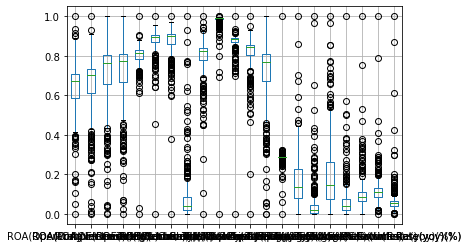

In [176]:
X.boxplot()

In [177]:
# 변수 선택 알고리즘 - 1변량 통계기반
# 독립변수가 종속변수에 미치는 영향에 따른 chi 값과 p-value 값을 확인한 후, p-value가 높은 값들을 제거하고 독립변수 선택
# 모형의 성능을 올릴 수 있는 독립변수들만 선별
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 0)

feat_selector = SelectKBest(chi2)
feat_selector.fit(X_train,Y_train)

feat_scores = pd.DataFrame()
feat_scores['chi'] = feat_selector.scores_
feat_scores['p'] = feat_selector.pvalues_
feat_scores['support'] = feat_selector.get_support()
feat_scores['attribute'] = X_train.columns
feat_scores[feat_scores['support']==True] 

,chi,p,support,attribute
0,1.141722,0.285289,True,ROA(Operating Income)(%)
1,1.397027,0.237222,True,ROA(Pretax Income)(%)
2,1.671520,0.196055,True,ROA(Net Income)(%)
3,1.550521,0.213059,True,"ROA(Comprehensive Income, 3y)(%)"
7,4.447110,0.034960,True,Total Debt to Total Equity(%)
12,1.478196,0.224057,True,Cashflow to Total Assets(avg)(%)
14,1.825640,0.176643,True,Asset Turnover Ratio(times)
15,6.598041,0.010209,True,Capital Stock Turnover Ratio(times)
16,5.359798,0.020606,True,Liability Turnover Ratio(times)
19,0.513784,0.473505,True,Total Assets Growth Rate(yoy)(%)


In [178]:
# 변수 선택 알고리즘 - 모형기반 선택(랜덤포레스트)
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
feat_selector = SelectFromModel(RandomForestClassifier(n_estimators= 100, random_state =0), threshold= 'median')
feat_selector.fit(X_train,Y_train)

feat_scores = pd.DataFrame()
feat_scores['attribute'] = X_train.columns
feat_scores['support'] = feat_selector.get_support()
feat_scores[feat_scores['support']==True]

,attribute,support
2,ROA(Net Income)(%),True
6,ROE(Net Income)(%),True
8,Cashflow(comm) to Total Equity(avg)(%),True
9,Cashflow to Revenue(%),True
10,Cashflow to Total Liabilities(avg)(%),True
11,Cashflow to Total Equity(avg)(%),True
13,Cashflow to Total Debt(avg)(%),True
15,Capital Stock Turnover Ratio(times),True
16,Liability Turnover Ratio(times),True
18,Total Liabilities Growth Rate(yoy)(%),True


In [179]:
# 재귀적 알고리즘 - 변수 선택
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import numpy as np
select = RFE(RandomForestClassifier(n_estimators = 100, random_state=0), n_features_to_select=5)

select.fit(X_train,Y_train)
features_bool = np.array(select.get_support())
features = np.array(X.columns)
result = features[features_bool]
print(result)

['ROA(Net Income)(%)' 'ROE(Net Income)(%)'
 'Cashflow(comm) to Total Equity(avg)(%)' 'Cashflow to Revenue(%)'
 'Capital Stock Turnover Ratio(times)']


In [180]:
# 로지스틱 회귀분석 - model1
from sklearn.linear_model import LogisticRegression

X = model1[['ROA(Net Income)(%)' ,'ROE(Net Income)(%)',
 'Cashflow(comm) to Total Equity(avg)(%)', 'Cashflow to Revenue(%)',
 'Capital Stock Turnover Ratio(times)']]
y = model1['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
    #print(X_train)

## logistic regression
biologit = LogisticRegression(C=1, random_state=0)
biologit.fit(X_train,y_train)
pred = biologit.predict(X_test)
    #print(pred)

## 예측력 확인
print('{:.5f}'.format(biologit.score(X_train,y_train)))
print('{:.5f}'.format(biologit.score(X_test,y_test)))

0.76292
0.72289


In [181]:
# k-fold 교차검증
from sklearn.model_selection import cross_val_score
scores = cross_val_score(biologit, X, y, scoring='accuracy', cv=5)
print(scores)
print('CV 평균 점수: {}'.format(scores.mean()))

[0.79518072 0.74698795 0.84146341 0.68292683 0.80487805]
CV 평균 점수: 0.7742873934763445


In [182]:
# 분류모형
from sklearn.metrics import classification_report
# accuracy(정확도) - 전체 예측 건수에서 정답을 맞힌 건수의 비율(TP+TN/TP+TN+FP+FN)
# recall(재현율) - 정답이 TP,FN인 것 중 TP의 비율
# precision(정밀도) - TP/TP+FP 
print(classification_report(y_test,pred))
print()

              precision    recall  f1-score   support

           0       0.65      0.87      0.75        39
           1       0.84      0.59      0.69        44

    accuracy                           0.72        83
   macro avg       0.75      0.73      0.72        83
weighted avg       0.75      0.72      0.72        83




In [183]:
# 회귀계수
print('{0:.5f}, {1:.5f}, {2:.5f}, {3:.5f}, {4:.5f}'.format(biologit.coef_[0,0],biologit.coef_[0,1],biologit.coef_[0,2],biologit.coef_[0,3],biologit.coef_[0,4]))

-3.16245, -1.34886, -1.47414, 0.85839, -2.40235


In [189]:
# 랜덤 포레스트 - model1
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
rf = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=5)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
    #print(pred)

# 예측력
print('{:.5f}'.format(rf.score(X_train,y_train)))
print('{:.5f}'.format(rf.score(X_test,y_test)))

0.86930
0.77108


In [190]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77        39
           1       0.82      0.73      0.77        44

    accuracy                           0.77        83
   macro avg       0.77      0.77      0.77        83
weighted avg       0.78      0.77      0.77        83



In [192]:
# k-fold
scores = cross_val_score(rf, X, y, scoring='accuracy', cv=5)
print(scores)
print('CV 평균 점수: {}'.format(scores.mean()))

[0.8030303  0.77272727 0.71212121 0.74242424 0.70769231]
CV 평균 점수: 0.7475990675990676


기타

In [187]:
model1 = sm.Logit(y_train, X_train)
results= model1.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.497907
         Iterations 7


In [188]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  329
Model:                          Logit   Df Residuals:                      324
Method:                           MLE   Df Model:                            4
Date:                Sat, 31 Jul 2021   Pseudo R-squ.:                  0.2816
Time:                        08:19:03   Log-Likelihood:                -163.81
converged:                       True   LL-Null:                       -228.01
Covariance Type:            nonrobust   LLR p-value:                 8.595e-27
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
ROA(Net Income)(%)                        -0.0327      0.019     -1.763      0.078      -0.069       0.004
ROE(Net Income)(%)                        -0.0252      0.011     -2.197      0.028      -0.048      -0.003
Cashflow(comm) to Total Equity(avg)(%)     0.0163      0.011      1.513      0.130      -0.005       0.037
Cashflow to Revenue(%)                     0.0016      0.001      2.067      0.039    8.46e-05       0.003
Capital Stock Turnover Ratio(times)       -0.0857      0.017     -5.002      0.000      -0.119      -0.052
==========================================================================================================
"""